#**Business Problem**
Predict the Stock Prices of *Tesla Inc.* based on Historical Data
#**Data Science Problem**
Build a regression engine that predicts and calculates the Future Stock Price.

## ***1. Import Libraries and Dependencies***

In [36]:
pip install fbprophet

In [46]:
pip install gradio

     |████████████████████████████████| 1.1MB 20.4MB/s 
     |████████████████████████████████| 215kB 51.0MB/s 
     |████████████████████████████████| 3.2MB 43.6MB/s 
     |████████████████████████████████| 962kB 34.8MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=f9f5d9e516012867afdcb272783fc2938e60e2fbe2269425e5fdf8c95bc2db2f
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for Flask-BasicAuth: filename=Flask_BasicAuth-0.2.0-cp37-none-any.whl size=4232 sha256=5e8543226ca9df9224f6a63bd0d40af003c526a8d0dc0d9a82ae4c3aec4d85a6
  Stored in directory: /root/.cache/pip/wheels/8a/d5/8c/1f40bffc038e6ab2865836cc303e312e16de7b6b577be16b25
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=fa4084449b12a5501ce4516d55ff49396be0a200f30013ef1924eb03325bd360
  Stored in director

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)


In [44]:
from fbprophet import Prophet
import joblib

## ***2. Loading Data Source***

In [3]:
from google.colab import files
import io

uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [25]:
data = pd.read_csv(io.BytesIO(uploaded['TSLA.csv']))

## ***3. Understanding Data***

In [26]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-09,112.417999,115.036003,111.421997,114.599998,114.599998,68250000
1,2020-04-13,118.031998,130.399994,116.106003,130.190002,130.190002,112377000
2,2020-04-14,139.794006,148.376007,138.485992,141.977997,141.977997,152882500
3,2020-04-15,148.399994,150.626007,142.000000,145.966003,145.966003,117885000
4,2020-04-16,143.388000,151.889999,141.343994,149.042007,149.042007,103289500
5,2020-04-17,154.455994,154.990005,149.531998,150.778000,150.778000,65641000
6,2020-04-20,146.539993,153.113998,142.442001,149.272003,149.272003,73733000
7,2020-04-21,146.024002,150.666000,134.757996,137.343994,137.343994,101045500
8,2020-04-22,140.796005,146.800003,137.742004,146.421997,146.421997,70827500
9,2020-04-23,145.520004,146.800003,140.626007,141.126007,141.126007,66183500


In [27]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-09,112.417999,115.036003,111.421997,114.599998,114.599998,68250000
1,2020-04-13,118.031998,130.399994,116.106003,130.190002,130.190002,112377000
2,2020-04-14,139.794006,148.376007,138.485992,141.977997,141.977997,152882500
3,2020-04-15,148.399994,150.626007,142.000000,145.966003,145.966003,117885000
4,2020-04-16,143.388000,151.889999,141.343994,149.042007,149.042007,103289500
5,2020-04-17,154.455994,154.990005,149.531998,150.778000,150.778000,65641000
6,2020-04-20,146.539993,153.113998,142.442001,149.272003,149.272003,73733000
7,2020-04-21,146.024002,150.666000,134.757996,137.343994,137.343994,101045500
8,2020-04-22,140.796005,146.800003,137.742004,146.421997,146.421997,70827500
9,2020-04-23,145.520004,146.800003,140.626007,141.126007,141.126007,66183500


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [29]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,455.519316,466.698295,442.518645,455.763991,455.763991,5.724586e+07
std,225.485539,229.530595,219.794788,225.172359,225.172359,3.151896e+07
min,112.417999,115.036003,111.421997,114.599998,114.599998,1.515770e+07
25%,280.199005,284.949997,271.628006,278.413986,278.413986,3.365040e+07
50%,423.760010,433.200012,415.000000,423.429993,423.429993,4.875950e+07
75%,654.744995,668.475006,626.579987,654.035004,654.035004,7.558275e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


In [30]:
num_col = data.select_dtypes(include = np.number).columns
categ_col = data.select_dtypes(exclude = np.number).columns

print("Numerical Columns: \n", num_col,"\n")
print("Categorical Columns: \n", categ_col)

Numerical Columns: 
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

Categorical Columns: 
 Index(['Date'], dtype='object')


## ***4. Exploratory Data Analysis***

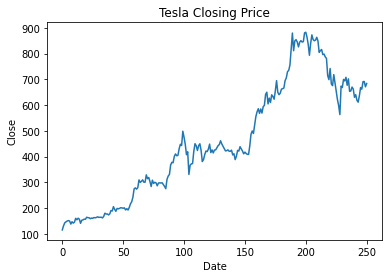

In [31]:
close = data['Close']
ax = close.plot(title='Tesla Closing Price')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

##**Tableau Data Viz**

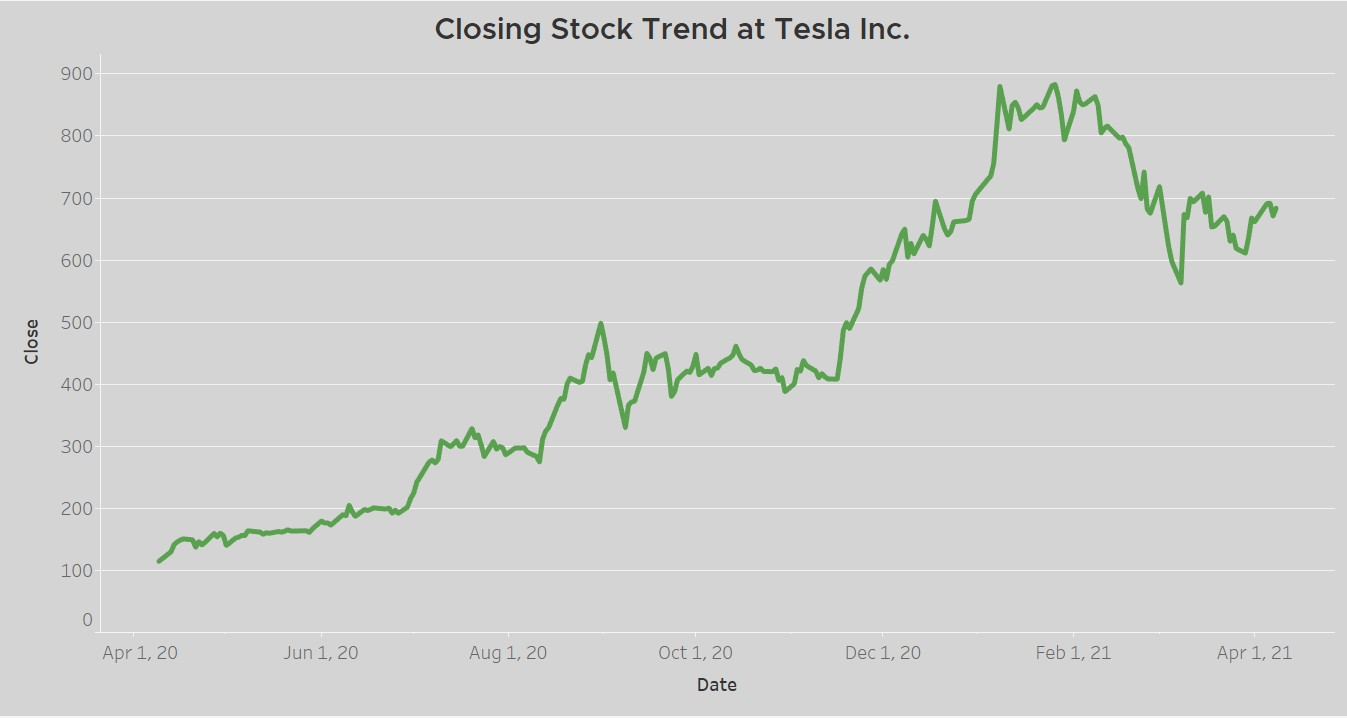

In [32]:
pd.to_datetime(data['Date'], infer_datetime_format = True)
df = data[['Date', 'Close']]

In [33]:
df = df.rename(columns={'Date' : 'ds', 'Close' : 'y' })

In [35]:
df.head(5)

,ds,y
0,2020-04-09,114.599998
1,2020-04-13,130.190002
2,2020-04-14,141.977997
3,2020-04-15,145.966003
4,2020-04-16,149.042007


## ***5. Model Building - Facebook Prophet API***

In [38]:
model = Prophet()
model.fit(df)
predict = model.make_future_dataframe(periods=365)
forecast = model.predict(predict)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
611,2022-04-04,-279.701451,-1180.400870,573.049333
612,2022-04-05,-280.384716,-1207.032283,556.404672
613,2022-04-06,-282.831009,-1202.659397,552.086963
614,2022-04-07,-285.860972,-1198.834823,553.101395
615,2022-04-08,-290.442792,-1225.133818,556.557580


## ***6. Model Forecast***

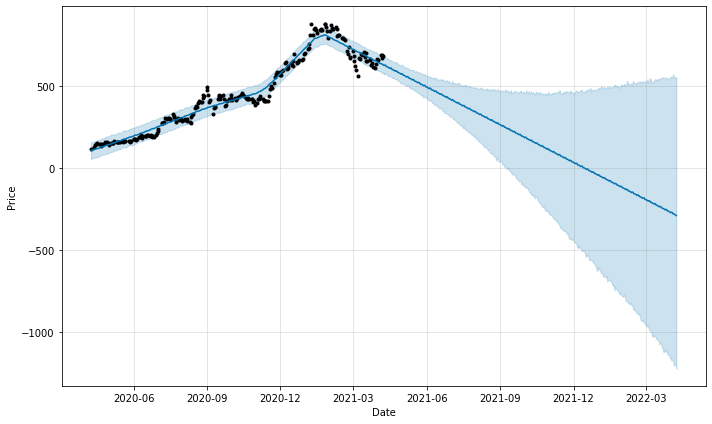

In [39]:
graph = model.plot(forecast, xlabel="Date", ylabel="Price")

## ***7. Model Forecast Components***

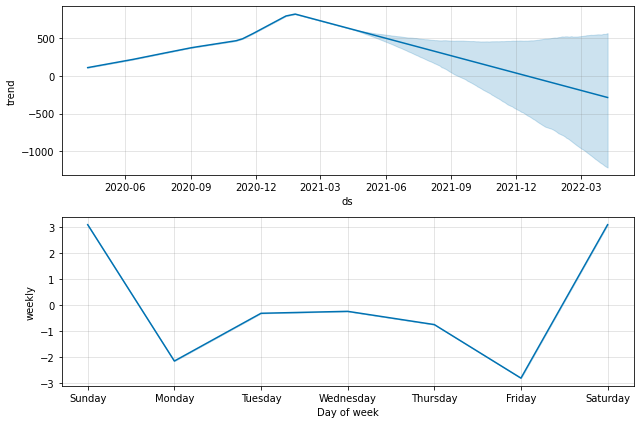

In [41]:
graph2 = model.plot_components(forecast)

In [45]:
joblib.dump(model, 'TeslaStock')

['TeslaStock']